In [10]:
!pip install -q keras-nightly
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from google.colab import drive
drive.mount('/content/gdrive')

tf.__version__

# Data Parameters
batch_size = 128

# Image Parameters
img_height, img_width = 32, 32

data_dir = pathlib.Path('/content/gdrive/My Drive/Colab Notebooks/Minjie Chen/PowerVision/netlistpng/isolated')

# Loading training dataset from Drive
train_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  color_mode='grayscale',
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Loading validation dataset
val_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  color_mode='grayscale',
  image_size=(img_height, img_width),
  label_mode="int",
  batch_size=64)

class_names = train_ds.class_names
print('Number of Classes:',len(class_names))
print(class_names)

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
regularization = 0.0005

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found 200 files belonging to 2 classes.
Using 160 files for training.
Found 200 files belonging to 2 classes.
Using 40 files for validation.
Number of Classes: 2
['isolated', 'nonisolated']


In [ ]:
from keras import layers
from keras import regularizers

model = keras.Sequential([

  layers.Conv2D(8, 5, activation='relu', kernel_regularizer="l2"),
  layers.MaxPooling2D(),

  layers.Conv2D(8, 5, activation='relu', kernel_regularizer="l2"),
  layers.MaxPooling2D(),

  layers.Flatten(),

  layers.Dense(32, activation='relu', kernel_regularizer="l2"),

  layers.Dense(len(class_names), activation='softmax', kernel_regularizer="l2")
])

model.compile(
  optimizer=keras.optimizers.Adam(),
  loss=keras.losses.SparseCategoricalCrossentropy(
    from_logits=True,
    ignore_class=None,
    reduction='sum_over_batch_size',
    name='sparse_categorical_crossentropy'),
  metrics=['accuracy'])

history = model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=500)

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6823 - loss: 2.3475 - val_accuracy: 0.5000 - val_loss: 4.3012
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7083 - loss: 1.8727 - val_accuracy: 0.5000 - val_loss: 3.3712
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7260 - loss: 1.6446 - val_accuracy: 0.5000 - val_loss: 3.3306
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7438 - loss: 1.4201 - val_accuracy: 0.4750 - val_loss: 3.4163
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6964 - loss: 1.3507 - val_accuracy: 0.4750 - val_loss: 3.0152
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7724 - loss: 1.2078 - val_accuracy: 0.5500 - val_loss: 2.5928
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7969 - loss: 1.1374 - val_accuracy: 0.5750 - val_loss: 2.4920
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8036 - loss: 1.0688 - val_accuracy: 0.5500 - val_loss: 2.6446
E

Text(0.5, 0, 'EPOCH')

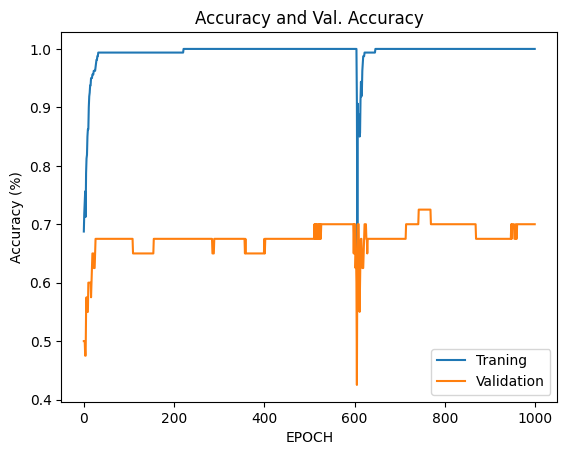

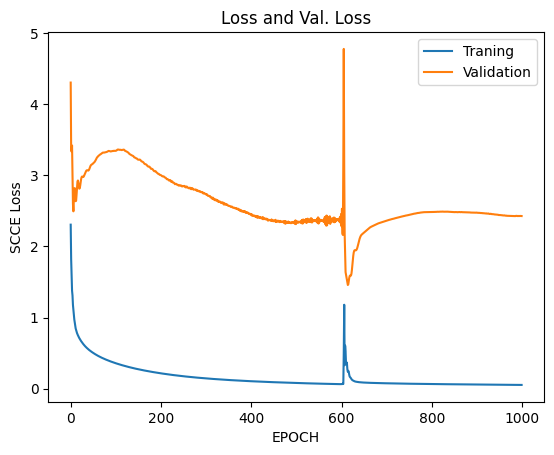

In [7]:
plt.subplots(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy and Val. Accuracy")
plt.legend(["Traning", "Validation"])
plt.ylabel("Accuracy (%)")
plt.xlabel("EPOCH")
plt.subplots(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Traning", "Validation"])
plt.title("Loss and Val. Loss")
plt.ylabel("SCCE Loss")
plt.xlabel("EPOCH")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 8)           │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 8)           │           1,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           6,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,944 (97.44 KB)

 Trainable params: 8,314 (32.48 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,630 (64.96 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7000 - loss: 2.4258
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Confusion matrix, without normalization


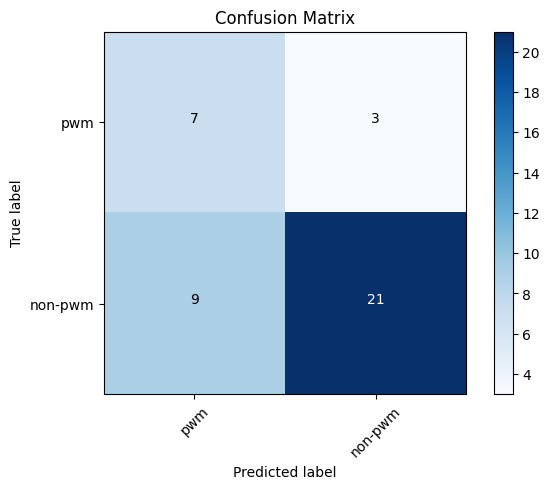

In [9]:
from sklearn import metrics

model.summary()
model.evaluate(val_ds,  batch_size=512, verbose=1)

import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

predictions = np.array([])
labels =  np.array([])
for x, y in val_ds:
    predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=-1)])
    labels = np.concatenate([labels, np.array(y)])

cm = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

class_names = ['pwm','non-pwm']
plot_confusion_matrix(cm=cm, classes=class_names, title='Confusion Matrix',)